# Case study - Anomaly Order Detection and Response

- Main Objective - *The business problem: How can Tierra Del Fuego better fulfill Pazzo’s orders—even anomalous ones—and prevent cuts?* 
- Optimize Inventory level
- Assuming TDF can take action one week before it.



## Data Description:
- TDF Data
    - SKU : Product Identifier
    - DC : Distribution Center
    - Time : Week # That purchase order was placed
    - Purchase Order Units : 
    - Fulfilled Units : 
    - Cuts will show in the next week order

- Pazzo Direct Salse Data
    - Sales Attributes
    - Inventory Attributes
    - Order Forecast
    


## Deliverables
- Find Interesting Performance trends in TDF's Supply chain
- Develop Proof of concept model
- Design the next steps and adoption plan
- Summarize the results

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas_profiling as prof

In [2]:
#!dir

In [3]:
df_tdf = pd.read_csv('TDF.csv',parse_dates=['Date'])
df_pazzo = pd.read_csv('PAZZO.csv',parse_dates=['Date'])

In [4]:
df_tdf.head()

,DC,Date,SKU,Purchase Order Units,Fulfilled Units
0,DC East,2017-10-02,SKU001,10,10
1,DC East,2017-10-09,SKU001,24,24
2,DC East,2017-10-16,SKU001,0,0
3,DC East,2017-10-23,SKU001,0,0
4,DC East,2017-10-30,SKU001,3,3


In [26]:
df_tdf.describe(include='all')

,DC,Date,SKU,Purchase Order Units,Fulfilled Units
count,5200,5200,5200,5200.000000,5200.000000
unique,2,52,50,NaN,NaN
top,DC West,2018-05-21 00:00:00,SKU025,NaN,NaN
freq,2600,100,104,NaN,NaN
first,NaN,2017-10-02 00:00:00,NaN,NaN,NaN
last,NaN,2018-09-24 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,138.991538,87.978654
std,NaN,NaN,NaN,442.871357,299.124864
min,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,7.000000,1.000000


In [22]:
df_tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
DC                      5200 non-null object
Date                    5200 non-null datetime64[ns]
SKU                     5200 non-null object
Purchase Order Units    5200 non-null int64
Fulfilled Units         5200 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 203.2+ KB


In [5]:
df_tdf['Cut_units'] = df_tdf['Purchase Order Units']-df_tdf['Fulfilled Units']

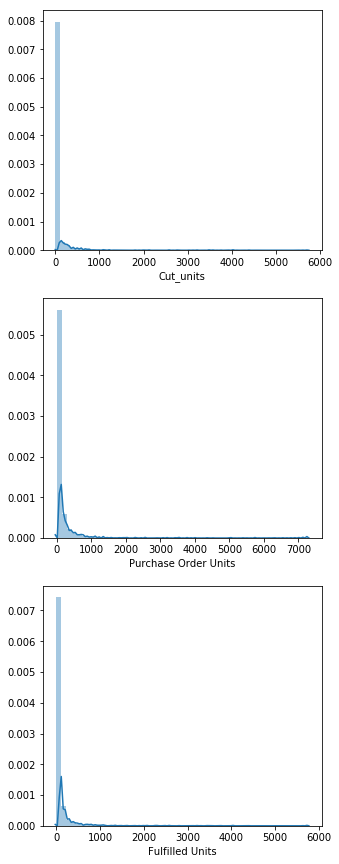

In [103]:
fig,ax = plt.subplots(3,figsize=(5,15))
sns.distplot(df_tdf['Cut_units'],ax=ax[0])
sns.distplot(df_tdf['Purchase Order Units'],ax=ax[1])
sns.distplot(df_tdf['Fulfilled Units'],ax=ax[2])

In [29]:
df_tdf['Cut_units'].describe()

count    5200.000000
mean       51.012885
std       272.448694
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      5744.000000
Name: Cut_units, dtype: float64

In [30]:
df_tdf.shape

(5200, 6)

In [35]:
# Anomaly orders
df_tdf[(df_tdf['Cut_units']> df_tdf['Cut_units'].quantile(0.95))].shape


(258, 6)

In [ ]:

# IN which time period Most Cut happens
# Building Heatmap plot TimeStamp by Product Per DIstribution center for Cut Units per month or week
# Find out most ordered product by month or some other time ( Bar plot)
# Modeling Features, Previous quanity oredered, Days since the previous oreder
# Reorder immediately
# Tree map to visulize about order behavior ## https://www.kaggle.com/philippsp/exploratory-analysis-instacart
# Associte Rule Mining???
# Pi plot of percentage orders
# Number of orders per week line chart
# Show how much are we making to how much we can incerease
# Can Apply Market Basket Analysis to find out which product togather happens for high demanding
# Compare order units from Pazzos data to TDF's Data
# From the customer buying pattern, if we can predict the anomaly order 1 week or 2 week before tham, we can provide then, we can reduce the number of Cut orders And also then classify future orders into anomaly orders
# Adding model features like when it is going to be holidays
# These anomalies can be due to promotoional activities or holidays featurenames: isweekend,isholiday, 
# location, demographic for future prediction
# Relationship between East and West order. If order in East then order in west
# ANalyzing When capacity are 100% fulfiled

In [32]:
# Number of Products in the Dc Centers
dcs = df_tdf['DC'].unique()
print('Number of Products in %s'%dcs[0],df_tdf[(df_tdf['DC']==dcs[0])]['SKU'].nunique())
print('Number of Products in %s'%dcs[1],df_tdf[(df_tdf['DC']==dcs[1])]['SKU'].nunique())

Number of Products in DC East 50
Number of Products in DC West 50


In [ ]:
# May be sone day products are only needed fron some distribution center

In [26]:
# Stacked Bar plot funciton
def stacked_bar(data,figsize=(16,16),title ='None',index='',columns='',values='',save_name=None):
    pivot_data = data.pivot(index=index,columns=columns,values=values)
    #pivot_data= pivot_data.sort_values(by=data[columns].unique(),ascending=False)
    fig,ax = plt.subplots(1,figsize=figsize)
    pivot_data.plot.barh(stacked=True,ax=ax)
    if title !='None':
        ax.set_title(title,fontsize=16)
    if save_name:
        plt.savefig('%s.png'%save_name,bbox_inches='tight')

In [7]:
# Which products are of most demand

df_order_units = df_tdf[['Purchase Order Units','SKU','DC']].groupby(by=['SKU','DC']).sum().reset_index()
df_order_units = df_order_units.merge(df_order_units.groupby(by='SKU').sum().reset_index().rename(columns = {'Purchase Order Units':'Total_demand_per_product'}),how='left',on='SKU')
df_order_units = df_order_units.merge(df_order_units[['DC','Purchase Order Units']].groupby(by='DC').sum().reset_index().rename(columns = {'Purchase Order Units':'Total_demand_per_dc'}),how='left',on='DC')
df_order_units['Percentage_order_per_product'] = df_order_units['Purchase Order Units']*100/df_order_units['Total_demand_per_product']
df_order_units['Percentage_order_per_dc'] = df_order_units['Purchase Order Units']*100/df_order_units['Total_demand_per_dc']
df_order_units.head()

,SKU,DC,Purchase Order Units,Total_demand_per_product,Total_demand_per_dc,Percentage_order_per_product,Percentage_order_per_dc
0,SKU001,DC East,1067,1910,384553,55.863874,0.277465
1,SKU001,DC West,843,1910,338203,44.136126,0.249259
2,SKU002,DC East,44556,84583,384553,52.677252,11.586439
3,SKU002,DC West,40027,84583,338203,47.322748,11.835200
4,SKU003,DC East,692,1503,384553,46.041251,0.179949


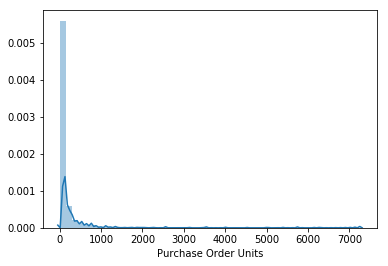

In [9]:
sns.distplot(df_tdf['Purchase Order Units'][df_tdf['DC']=='DC East'])

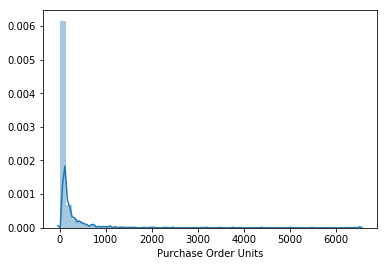

In [10]:
sns.distplot(df_tdf['Purchase Order Units'][df_tdf['DC']=='DC West'])

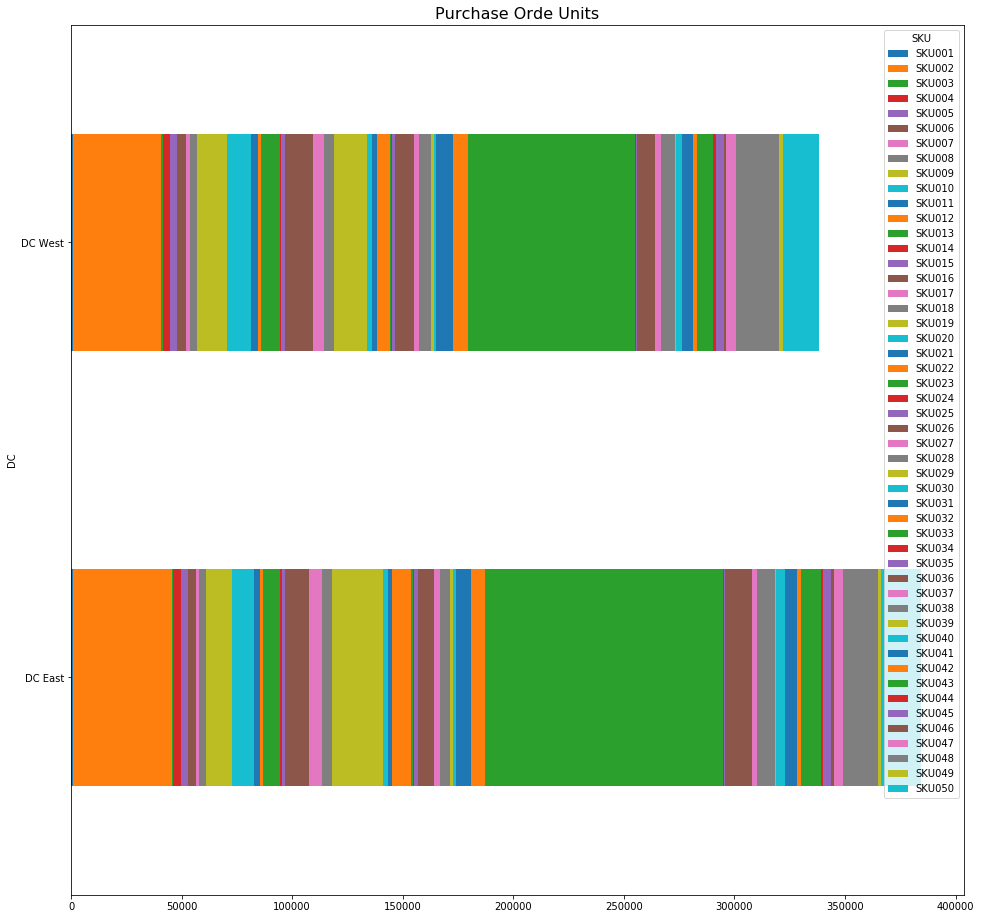

In [38]:
stacked_bar(df_order_units,index='DC',columns='SKU',values='Purchase Order Units',title='Purchase Order Units')

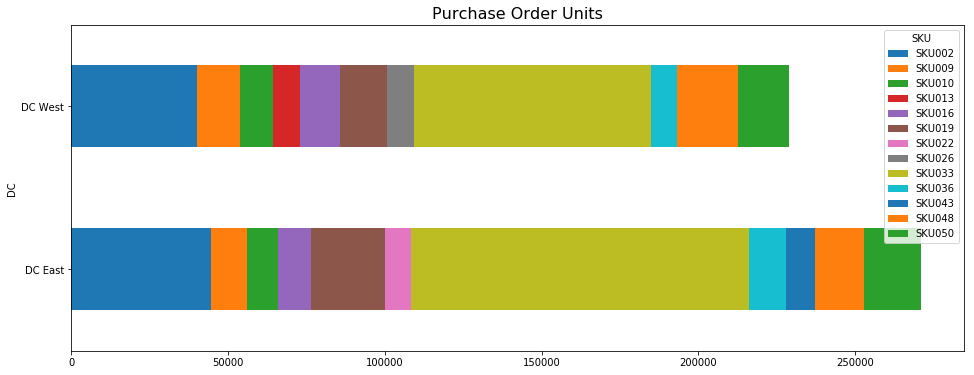

In [27]:
# Plotting for top 20 most Ordered product
data = df_order_units.sort_values(by='Purchase Order Units',ascending=False).iloc[:22,:]
stacked_bar(data,index='DC',columns='SKU',values='Purchase Order Units',title='Purchase Order Units',figsize=(16,6),save_name='Purchase_orderbydc')


#### All the product are asked to supply from both the DCS

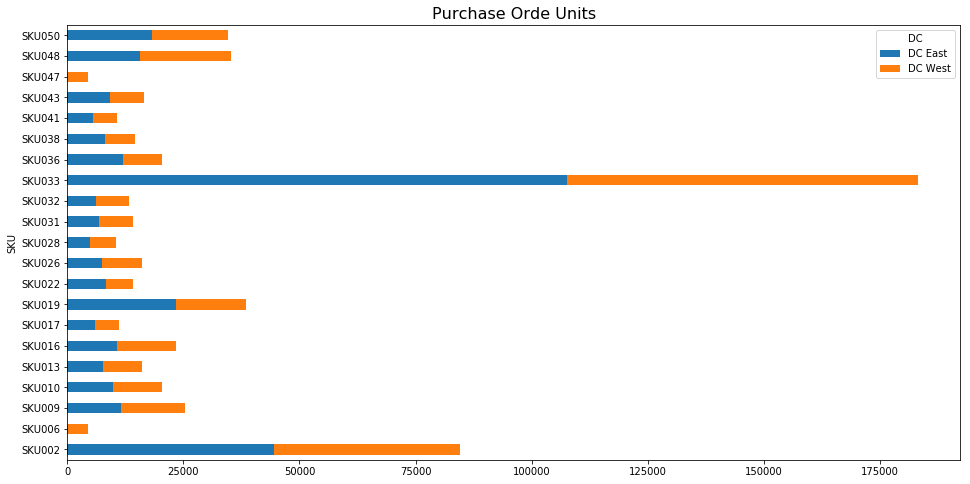

In [40]:
data = df_order_units.sort_values(by='Purchase Order Units',ascending=False).iloc[:40,:]
stacked_bar(data,index='SKU',columns='DC',values='Purchase Order Units',title='Purchase Order Units',figsize=(16,8))

- Most Frequently demanded products are 033,002,019,048,050\
- East has more purchase orders then the west


In [23]:
# WHich product and Distribution center has the most cut units
df_cut_units = df_tdf[['Cut_units','SKU','DC']].groupby(by=['SKU','DC']).sum().reset_index()
df_cut_units = df_cut_units.merge(df_cut_units.groupby(by='SKU').sum().reset_index().rename(columns = {'Cut_units':'Total_cut_per_product'}),how='left',on='SKU')
df_cut_units = df_cut_units.merge(df_cut_units[['DC','Cut_units']].groupby(by='DC').sum().reset_index().rename(columns = {'Cut_units':'Total_cut_per_dc'}),how='left',on='DC')
df_cut_units['Percentage_cut_per_product'] = df_cut_units['Cut_units']*100/df_cut_units['Total_cut_per_product']
df_cut_units['Percentage_cut_per_dc'] = df_cut_units['Cut_units']*100/df_cut_units['Total_cut_per_dc']
df_cut_units.head()

,SKU,DC,Cut_units,Total_cut_per_product,Total_cut_per_dc,Percentage_cut_per_product,Percentage_cut_per_dc
0,SKU001,DC East,460,786,154515,58.524173,0.297706
1,SKU001,DC West,326,786,110752,41.475827,0.294351
2,SKU002,DC East,18896,33433,154515,56.519008,12.229233
3,SKU002,DC West,14537,33433,110752,43.480992,13.125722
4,SKU003,DC East,80,229,154515,34.934498,0.051775


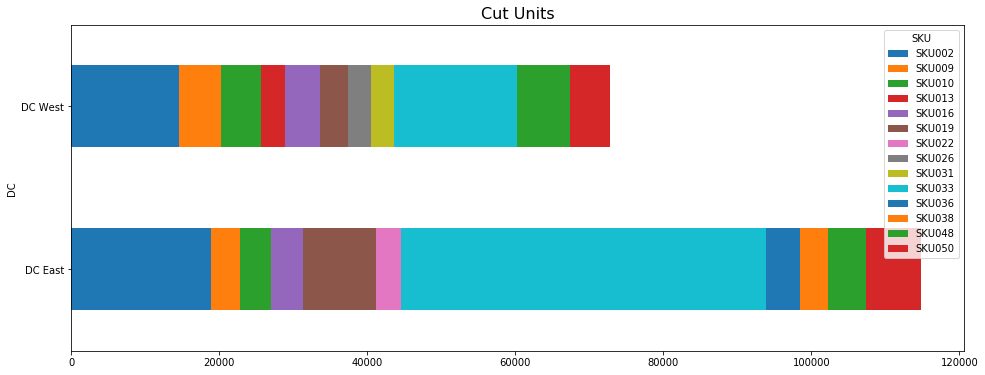

In [38]:
# Which are th most cut units
data = df_cut_units.sort_values(by='Cut_units',ascending=False).iloc[:22,:]
stacked_bar(data,index='DC',columns='SKU',values='Cut_units',title='Cut Units',figsize=(16,6),save_name='cut_units_bydc')


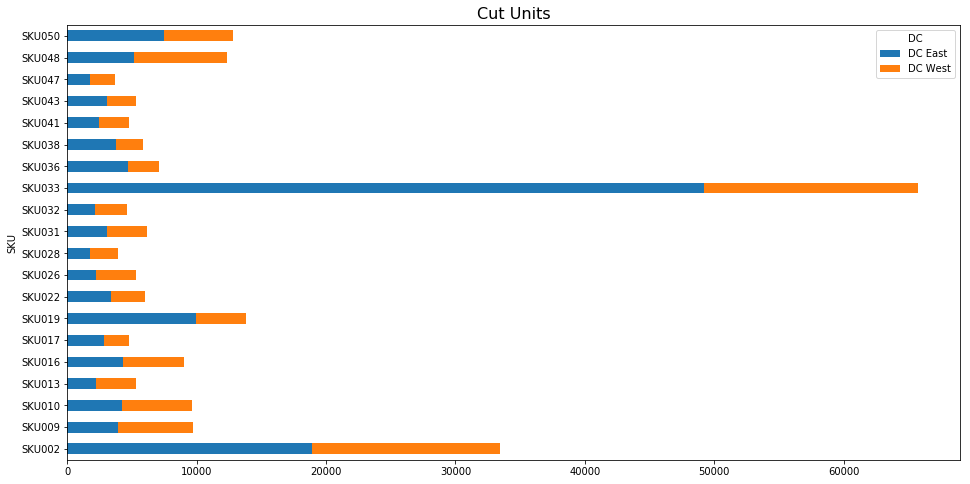

In [24]:
data = df_cut_units.sort_values(by='Cut_units',ascending=False).iloc[:40,:]
stacked_bar(data,index='SKU',columns='DC',values='Cut_units',title='Cut Units',figsize=(16,8))

In [40]:
# Looking at percentage to the order
df_order_cut_combined = pd.merge(df_order_units,df_cut_units,how='left',on=['SKU','DC'])


In [42]:
df_order_cut_combined['Purcentage_cut_over_demand'] = df_order_cut_combined['Cut_units']*100/df_order_cut_combined['Purchase Order Units']
df_order_cut_combined.head()

,SKU,DC,Purchase Order Units,Total_demand_per_product,Total_demand_per_dc,Percentage_order_per_product,Percentage_order_per_dc,Cut_units,Total_cut_per_product,Total_cut_per_dc,Percentage_cut_per_product,Percentage_cut_per_dc,Purcentage_cut_over_demand
0,SKU001,DC East,1067,1910,384553,55.863874,0.277465,460,786,154515,58.524173,0.297706,43.111528
1,SKU001,DC West,843,1910,338203,44.136126,0.249259,326,786,110752,41.475827,0.294351,38.671412
2,SKU002,DC East,44556,84583,384553,52.677252,11.586439,18896,33433,154515,56.519008,12.229233,42.409552
3,SKU002,DC West,40027,84583,338203,47.322748,11.835200,14537,33433,110752,43.480992,13.125722,36.317985
4,SKU003,DC East,692,1503,384553,46.041251,0.179949,80,229,154515,34.934498,0.051775,11.560694


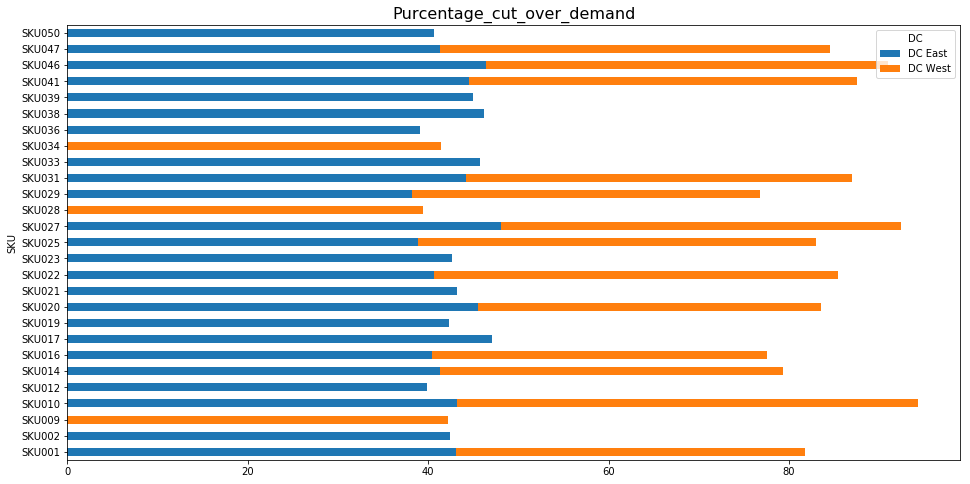

In [54]:
data = df_order_cut_combined.sort_values(by='Purcentage_cut_over_demand',ascending=False).iloc[:40,:]
stacked_bar(data,index='SKU',columns='DC',values='Purcentage_cut_over_demand',title='Purcentage_cut_over_demand',figsize=(16,8))

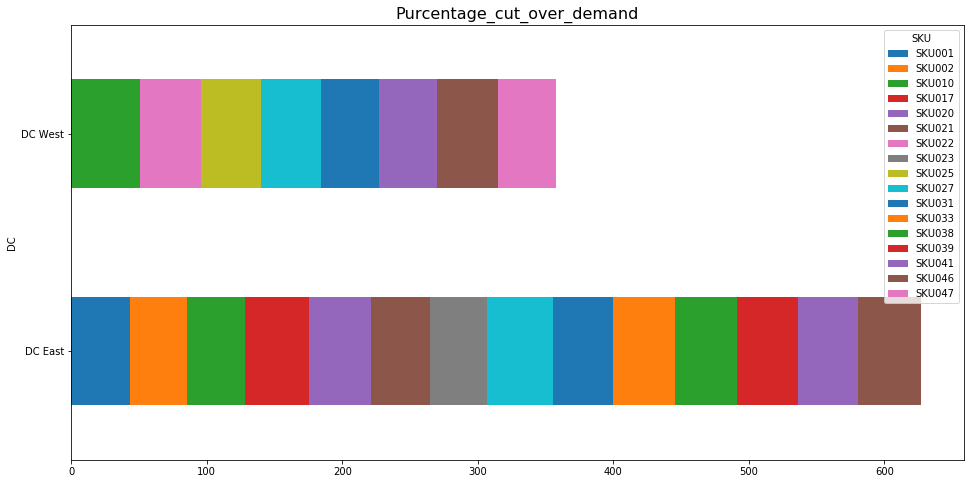

In [43]:
data = df_order_cut_combined.sort_values(by='Purcentage_cut_over_demand',ascending=False).iloc[:22,:]
stacked_bar(data,index='DC',columns='SKU',values='Purcentage_cut_over_demand',title='Purcentage_cut_over_demand',figsize=(16,8))

Looks like most demanded products are the one havinig the most cut units.
We also have to see that, what is the percentage order ratio is not able to fulfil

In [17]:
# WHich Products are most supplied by the TDF

df_supplied_units = df_tdf[['Fulfilled Units','SKU','DC']].groupby(by=['SKU','DC']).sum().reset_index()
df_supplied_units = df_supplied_units.merge(df_supplied_units.groupby(by='SKU').sum().reset_index().rename(columns = {'Fulfilled Units':'Total_supplied_per_product'}),how='left',on='SKU')
df_supplied_units = df_supplied_units.merge(df_supplied_units[['DC','Fulfilled Units']].groupby(by='DC').sum().reset_index().rename(columns = {'Fulfilled Units':'Total_supplied_per_dc'}),how='left',on='DC')
df_supplied_units['Percentage_cut_per_product'] = df_supplied_units['Fulfilled Units']*100/df_supplied_units['Total_supplied_per_product']
df_supplied_units['Percentage_cut_per_dc'] = df_supplied_units['Fulfilled Units']*100/df_supplied_units['Total_supplied_per_dc']
df_supplied_units.head()

,SKU,DC,Fulfilled Units,Total_supplied_per_product,Total_supplied_per_dc,Percentage_cut_per_product,Percentage_cut_per_dc
0,SKU001,DC East,607,1124,230038,54.003559,0.263869
1,SKU001,DC West,517,1124,227451,45.996441,0.227302
2,SKU002,DC East,25660,51150,230038,50.166178,11.154679
3,SKU002,DC West,25490,51150,227451,49.833822,11.206809
4,SKU003,DC East,612,1274,230038,48.037677,0.266043


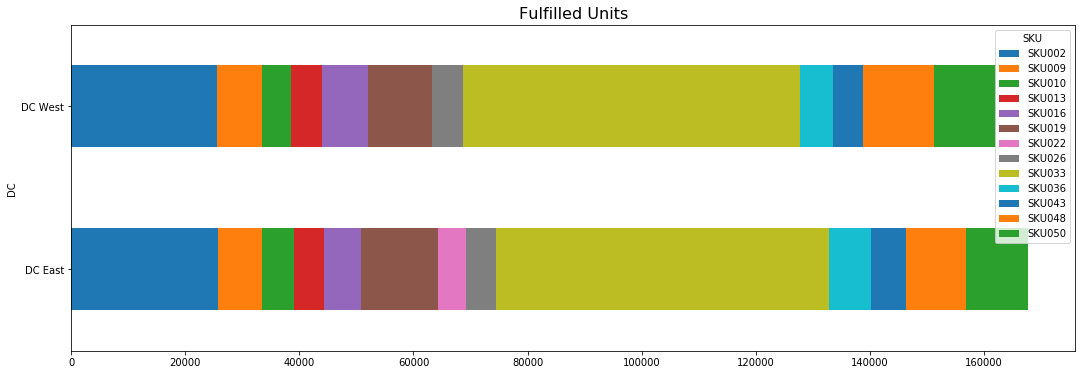

In [31]:
# Most Supplied Units
data = df_supplied_units.sort_values(by='Fulfilled Units',ascending=False).iloc[:25,:]
stacked_bar(data,index='DC',columns='SKU',values='Fulfilled Units',title='Fulfilled Units',figsize=(18,6),save_name='Fulfiled_units_bydc')

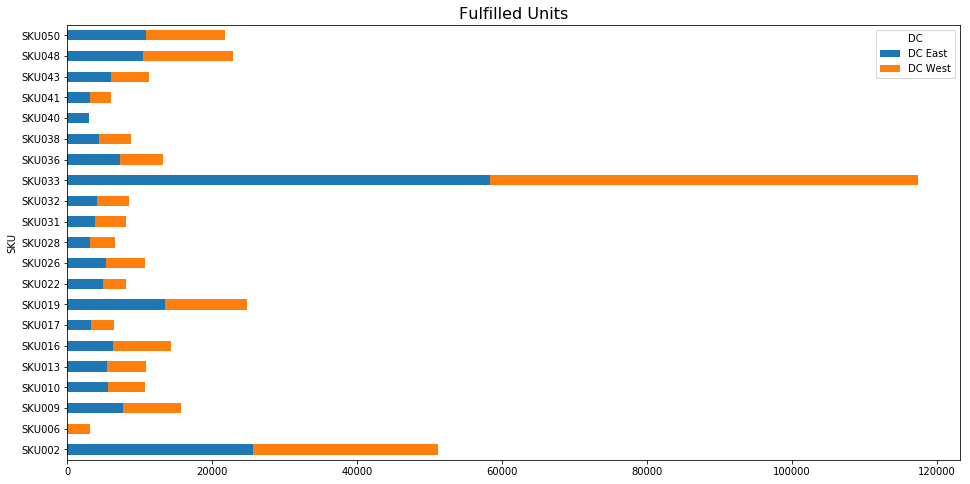

In [46]:
data = df_supplied_units.sort_values(by='Fulfilled Units',ascending=False).iloc[:40,:]
stacked_bar(data,index='SKU',columns='DC',values='Fulfilled Units',title='Fulfilled Units',figsize=(16,8))

- It looks like supply capacity at both the distribution center is same 
- But, because of higher demand at the DC east, they are having more cut units

### Visulizing all these above behaviour over time 


These can be done by doing it on heatmap 

In [45]:
def heatmap_plot(data,x,y,z,title='None',time_grouper='None',vmax=None,vmin=None,figsize=(24,16),savefig=None):
    if time_grouper!='None':
        temp = pd.DataFrame(data.groupby(by=[pd.Grouper(key='Date',freq=time_grouper),
                                            x])[z].sum()).reset_index()
    else:
        temp = data.copy()
    temp = temp.pivot(x,y,z)
    
    cmap='Reds'
    fig,ax=plt.subplots(1,1,figsize=figsize)
    if vmax!=None and vmin!=None:
        sns.heatmap(temp,cmap=cmap,vmax=vmax,vmin=vmin,annot=False, fmt="d")
        
    else:
        sns.heatmap(temp,cmap=cmap)
    ax.set_xticklabels(temp.columns.strftime('%b-%d-%Y')) 
    plt.setp(ax.xaxis.get_majorticklabels(),rotation=90)
    plt.gca().invert_yaxis()
    if title !='None':
        ax.set(title='%s %s average'%(z,time_grouper))
    if savefig:
        plt.savefig('%s.png'%savefig,bbox_inches='tight')
    return temp

In [36]:
df_tdf.head()

,DC,Date,SKU,Purchase Order Units,Fulfilled Units,Cut_units
0,DC East,2017-10-02,SKU001,10,10,0
1,DC East,2017-10-09,SKU001,24,24,0
2,DC East,2017-10-16,SKU001,0,0,0
3,DC East,2017-10-23,SKU001,0,0,0
4,DC East,2017-10-30,SKU001,3,3,0


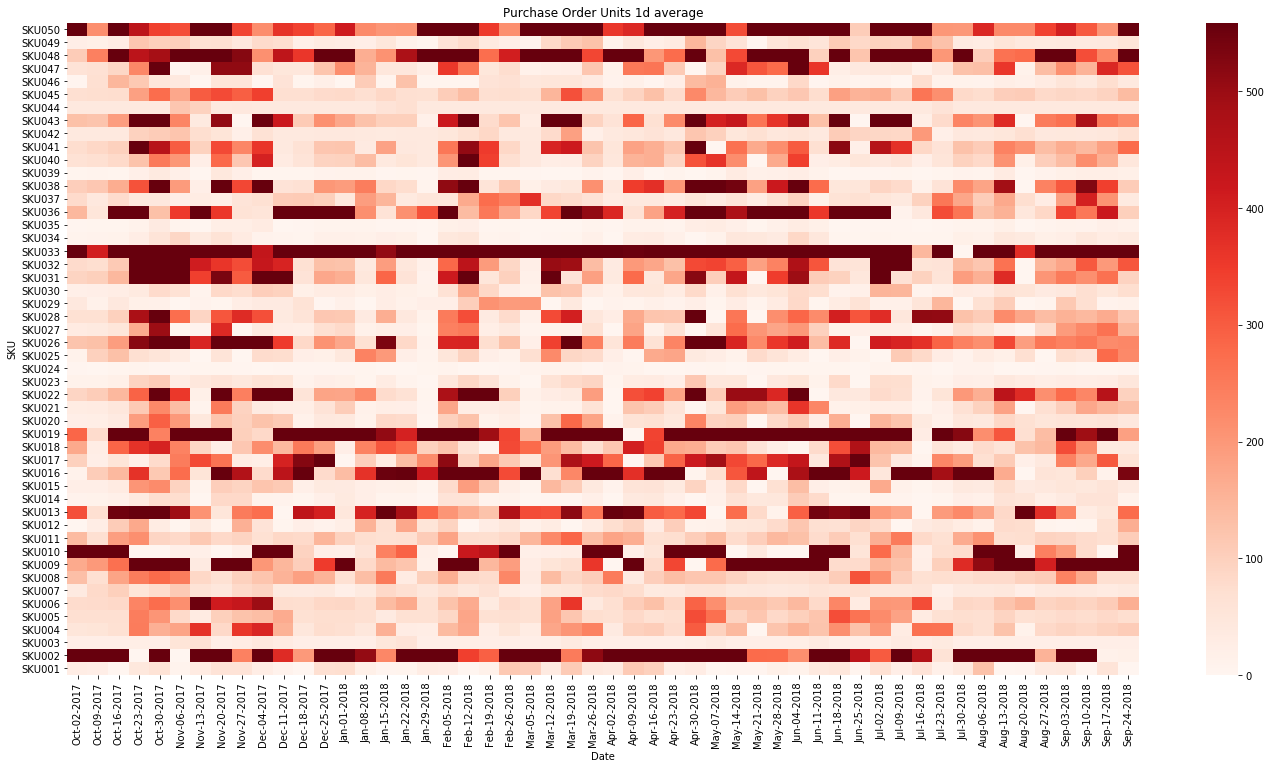

In [37]:
b = df_tdf['Purchase Order Units'].quantile(0.95)
a = df_tdf['Purchase Order Units'].quantile(0.05)
temp =heatmap_plot(df_tdf,'SKU','Date','Purchase Order Units',title='Purchase order units by SKU',time_grouper='1d',vmax=b,vmin=a,figsize=(24,12))

- Demand is constant for some products and for some it is seasonal

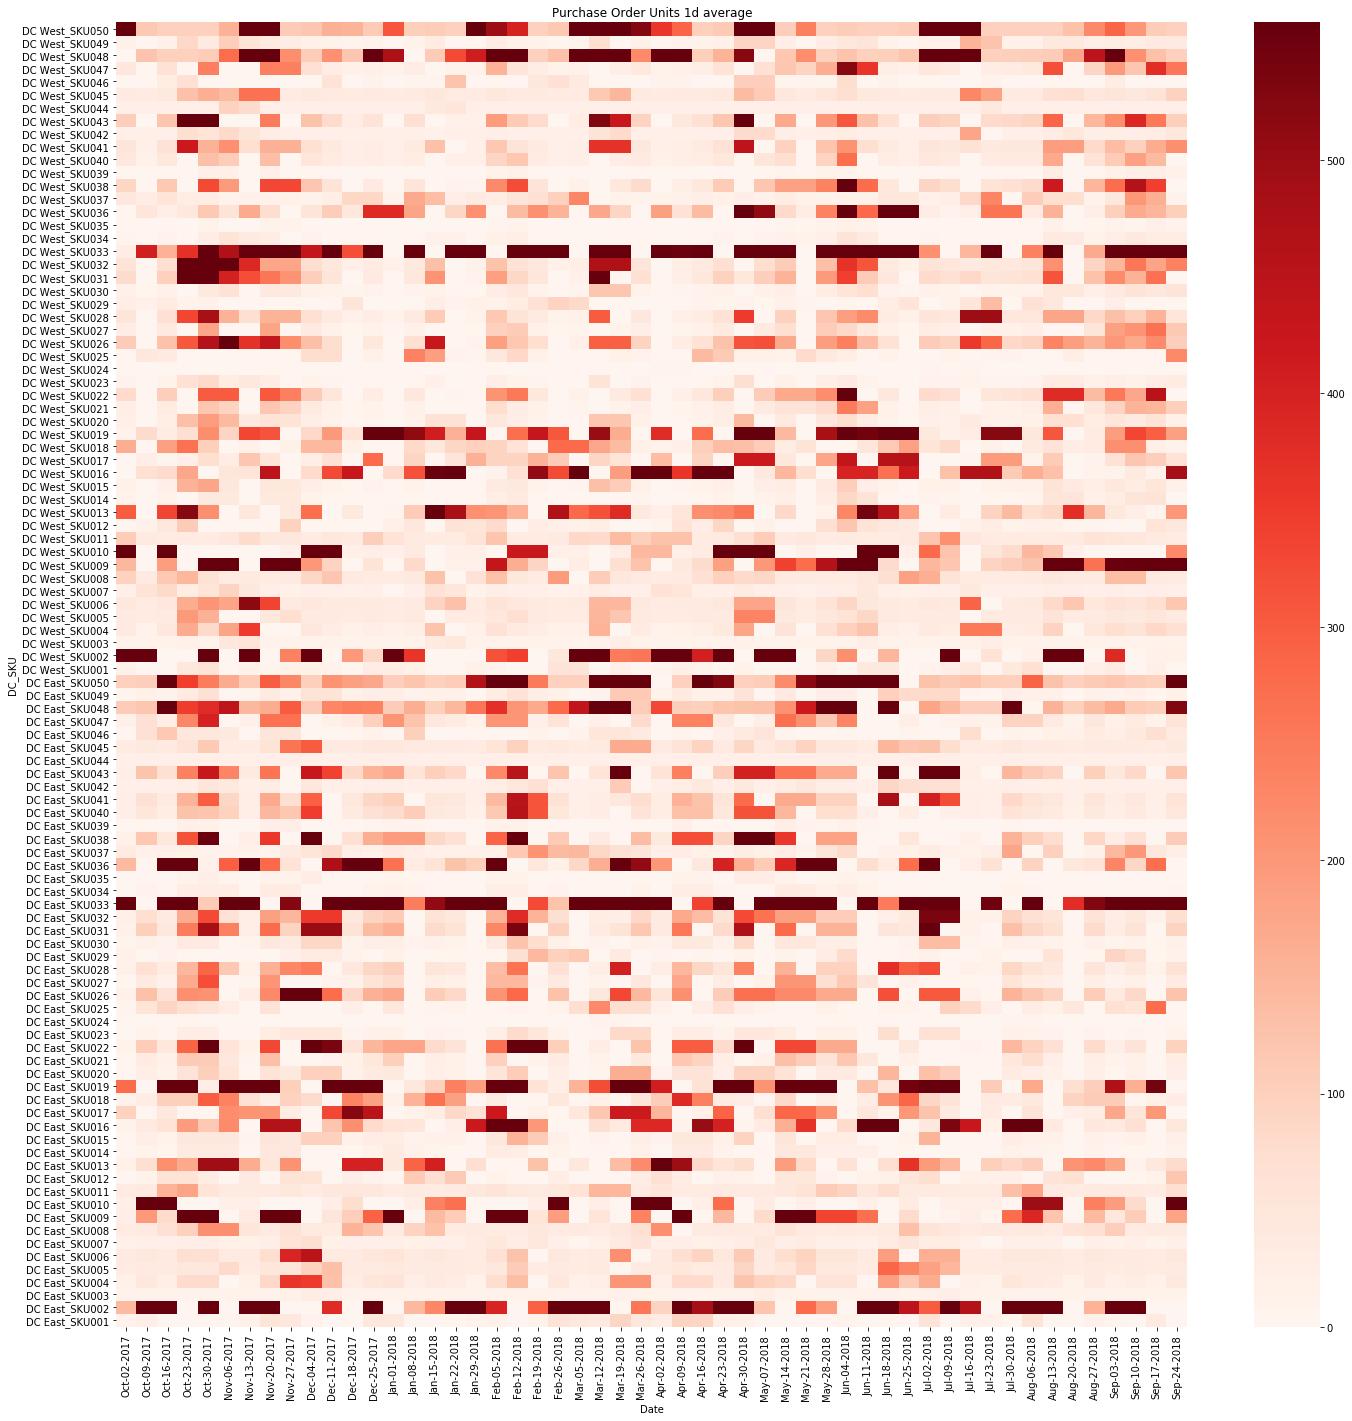

In [146]:
df_tdf['DC_SKU']= df_tdf['DC']+'_'+df_tdf['SKU']
b = df_tdf['Purchase Order Units'].quantile(0.95)
a = df_tdf['Purchase Order Units'].quantile(0.05)
temp =heatmap_plot(df_tdf,'DC_SKU','Date','Purchase Order Units',title='Purchase order units by SKU',time_grouper='1d',vmax=b,vmin=a,figsize=(24,24))

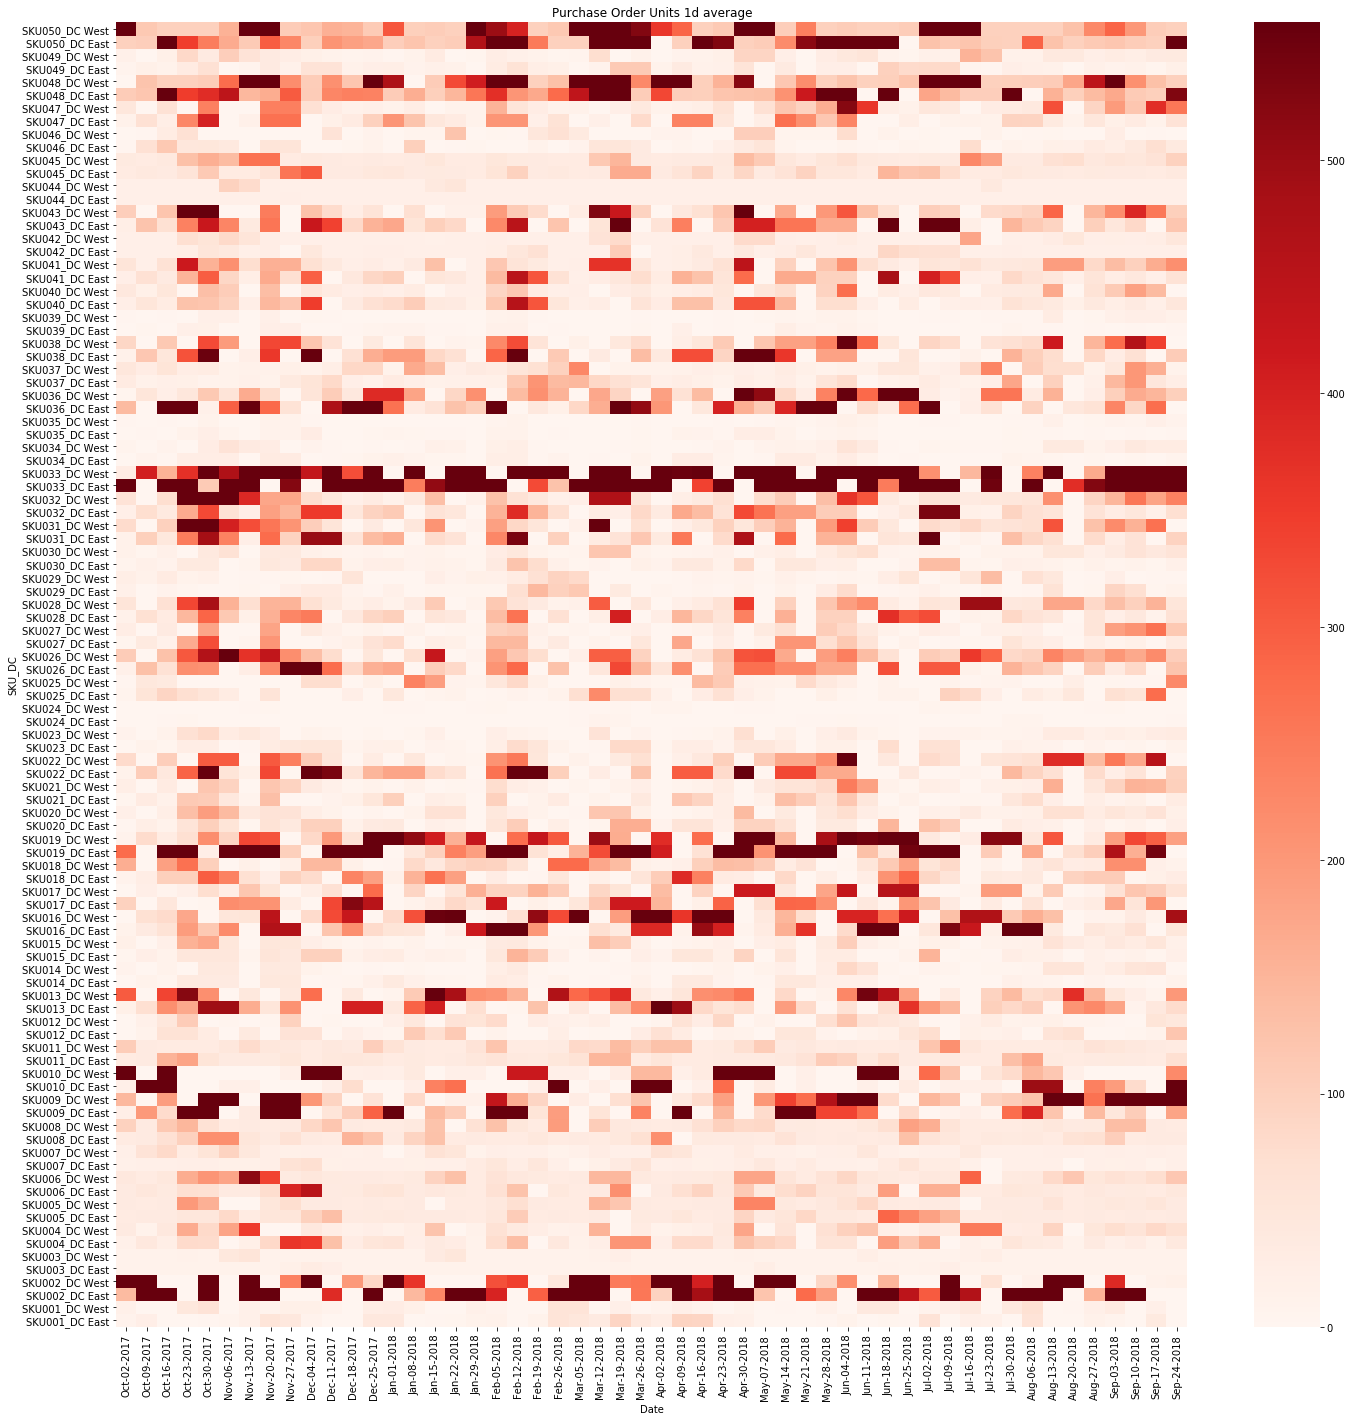

In [46]:
df_tdf['SKU_DC']= df_tdf['SKU']+'_'+df_tdf['DC']
b = df_tdf['Purchase Order Units'].quantile(0.95)
a = df_tdf['Purchase Order Units'].quantile(0.05)
temp =heatmap_plot(df_tdf,'SKU_DC','Date','Purchase Order Units',title='Purchase order units by SKU',time_grouper='1d',vmax=b,vmin=a,figsize=(24,24),savefig='Heatamp_purchase_order')

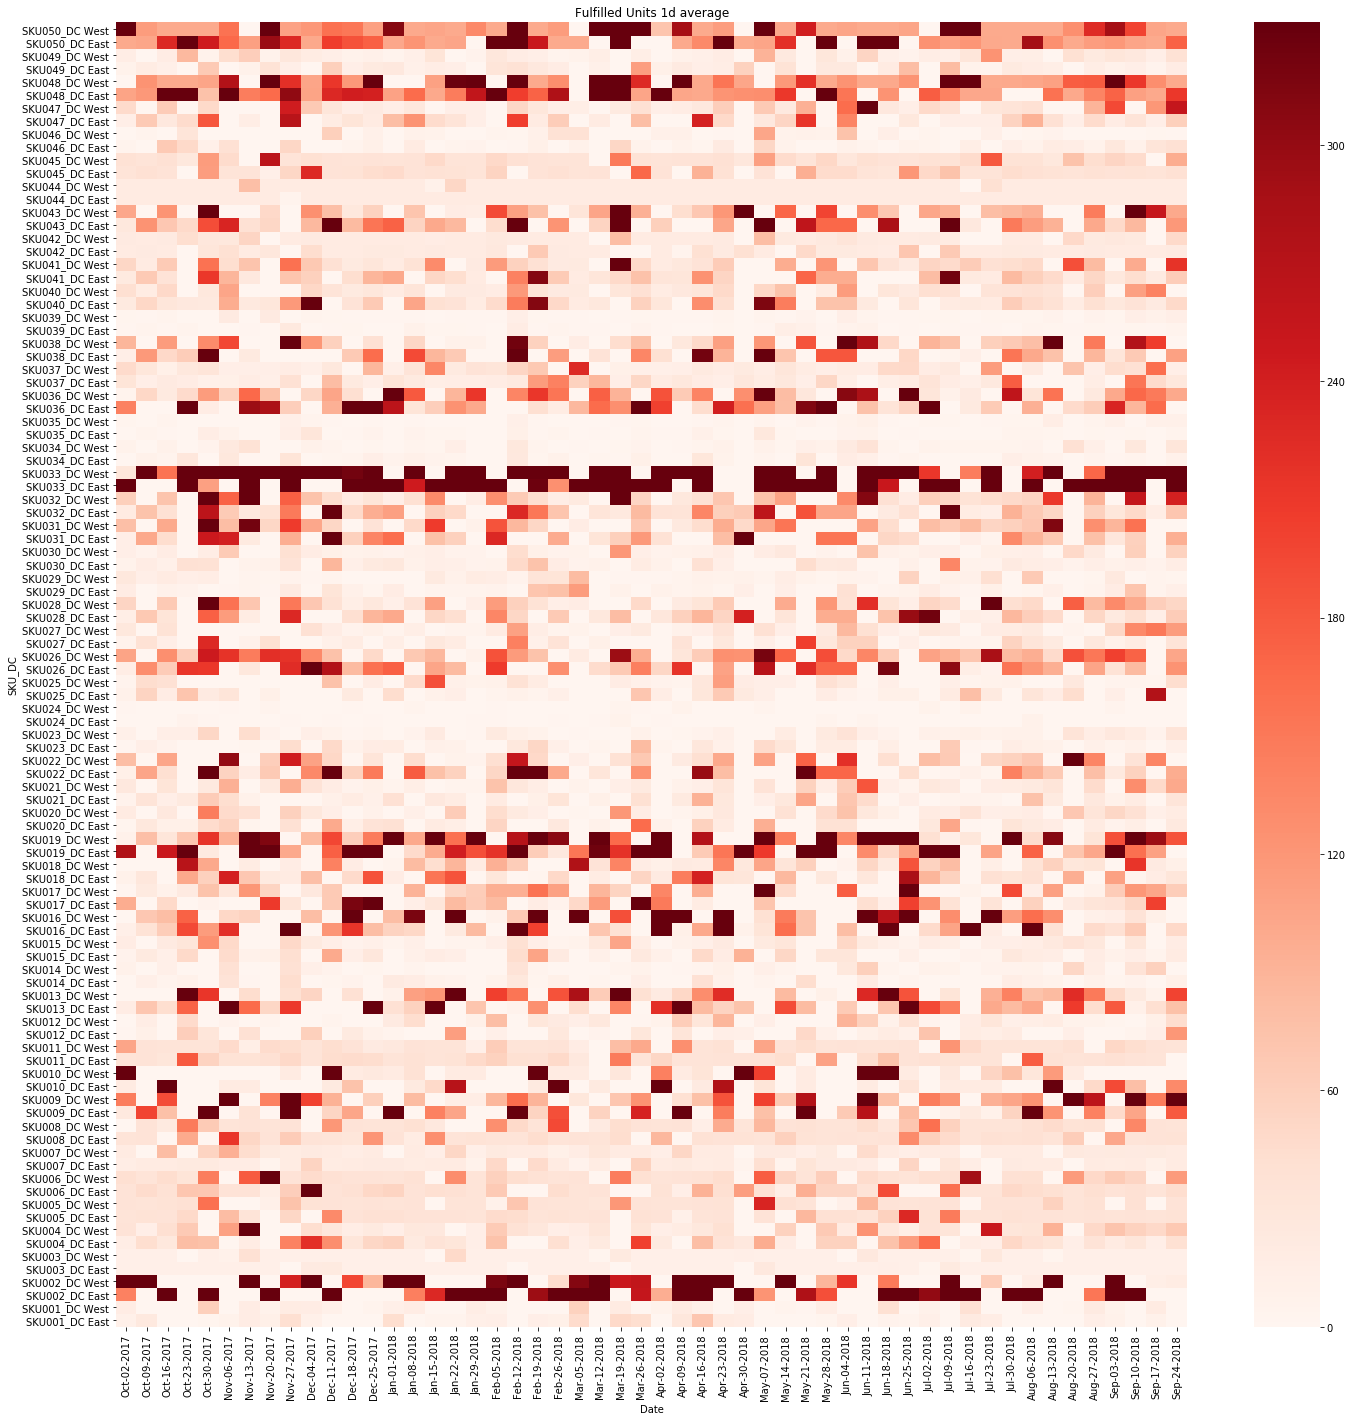

In [44]:
df_tdf['SKU_DC']= df_tdf['SKU']+'_'+df_tdf['DC']
b = df_tdf['Fulfilled Units'].quantile(0.95)
a = df_tdf['Fulfilled Units'].quantile(0.05)
temp =heatmap_plot(df_tdf,'SKU_DC','Date','Fulfilled Units',title='Purchase order units by SKU',time_grouper='1d',vmax=b,vmin=a,figsize=(24,24))

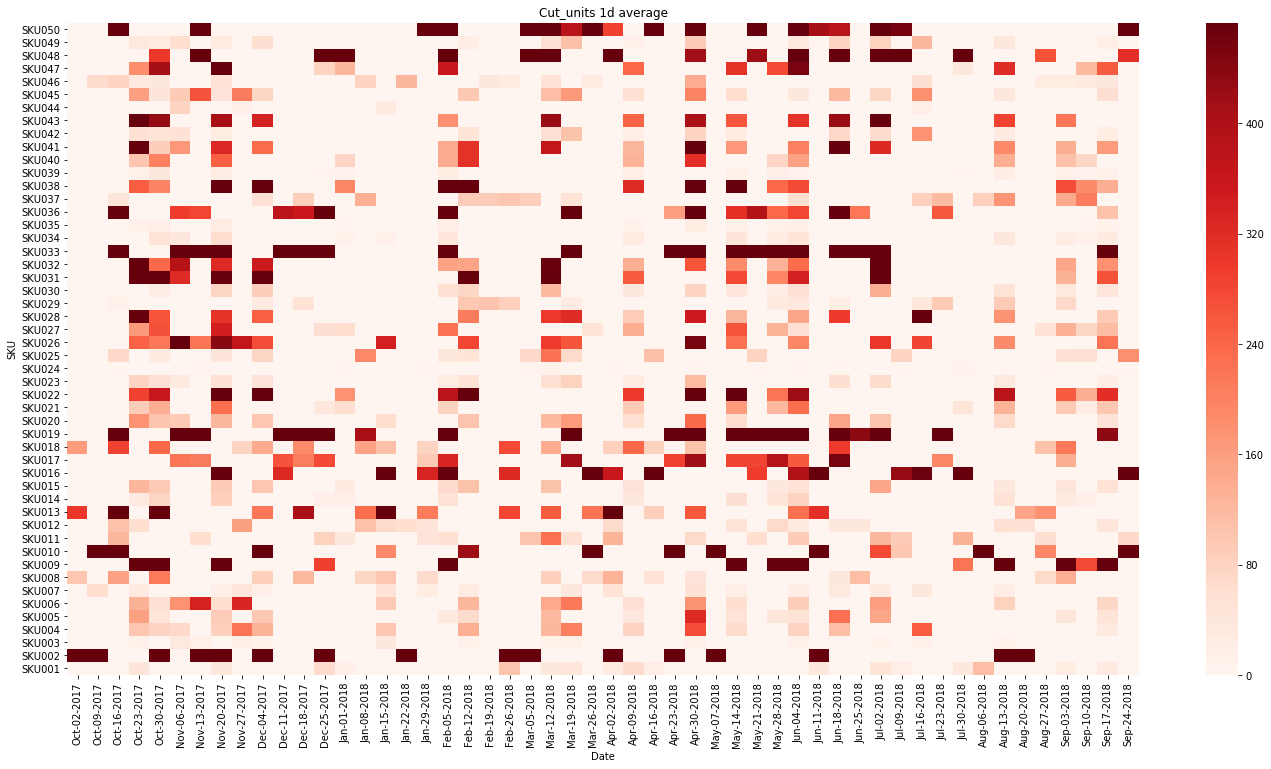

In [183]:
b = df_tdf['Cut_units'].quantile(0.975)
a = df_tdf['Cut_units'].quantile(0.025)
temp =heatmap_plot(df_tdf,'SKU','Date','Cut_units',title='Cut units by SKU',time_grouper='1d',vmax=b,vmin=a,figsize=(24,12))

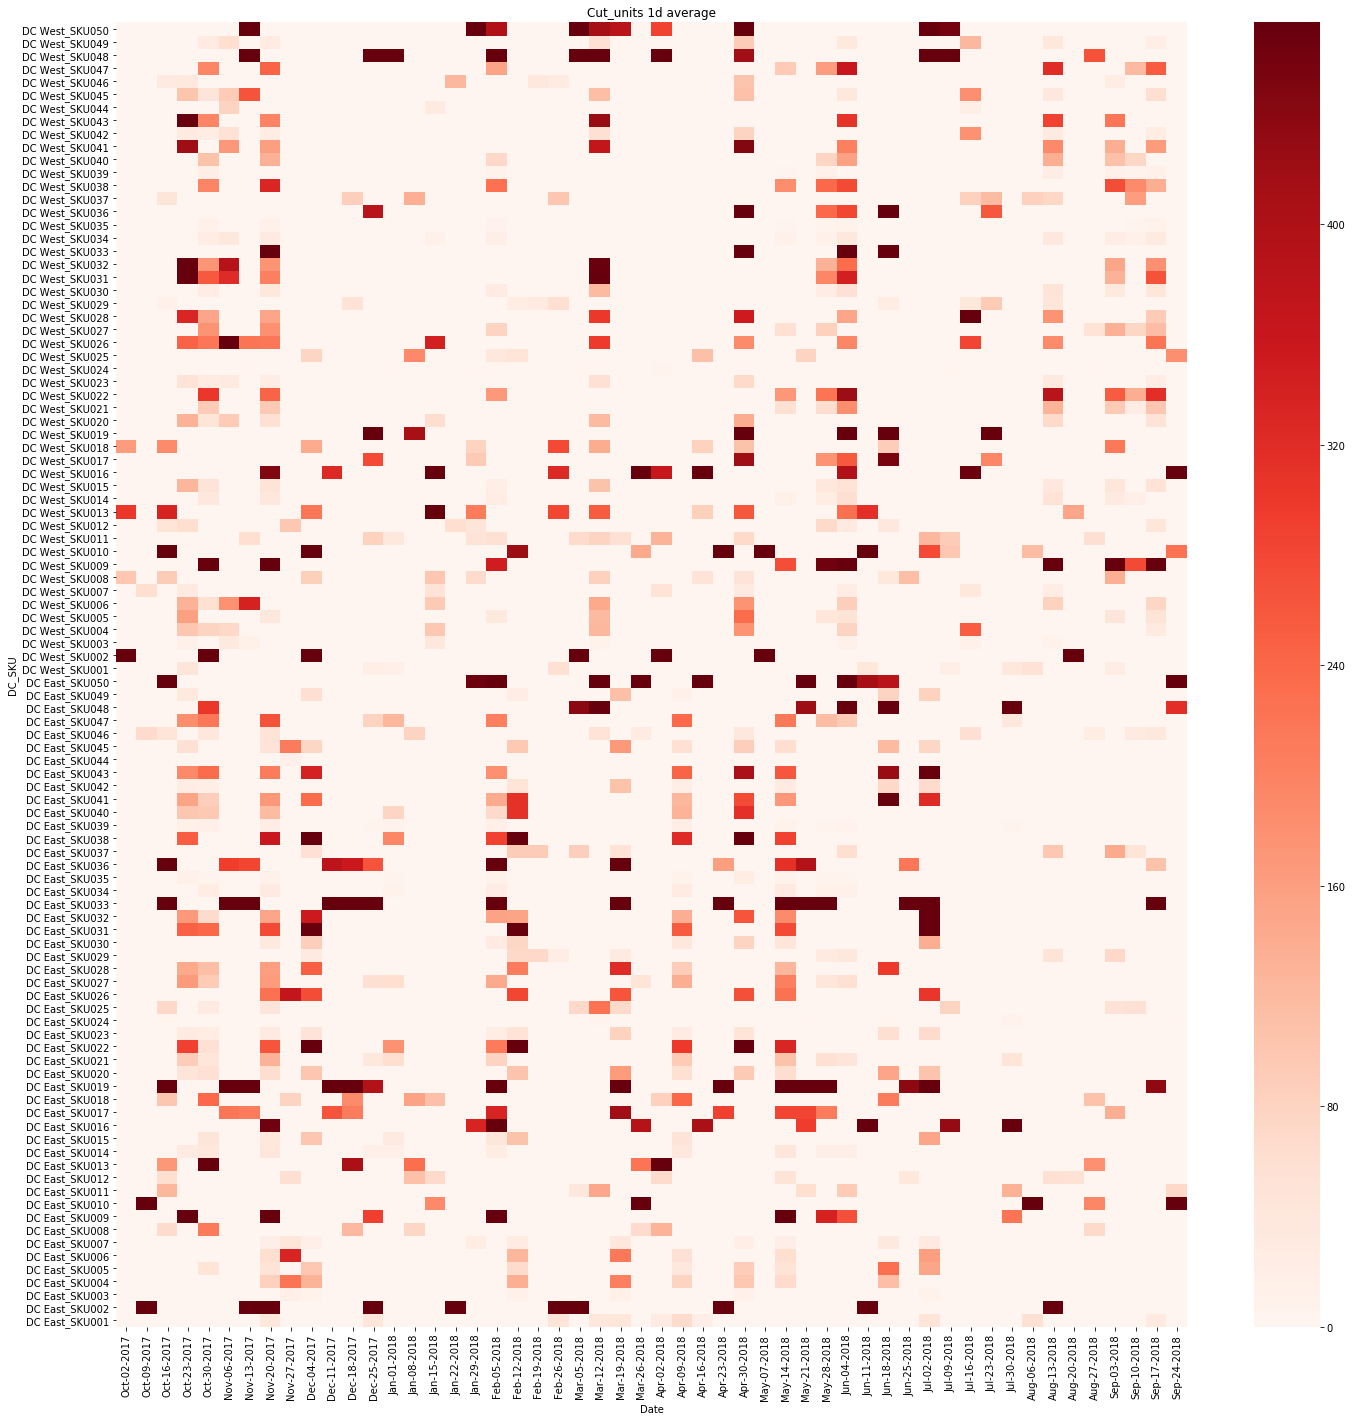

In [49]:
df_tdf['DC_SKU']= df_tdf['DC']+'_'+df_tdf['SKU']
b = df_tdf['Cut_units'].quantile(0.975)
a = df_tdf['Cut_units'].quantile(0.025)
temp =heatmap_plot(df_tdf,'DC_SKU','Date','Cut_units',title='Cut units by SKU',time_grouper='1d',vmax=b,vmin=a,figsize=(24,24),savefig='Cutunits_heatmap')

Every 4 Week there is high cut happens, this can go into the model

In [121]:
df_tdf.groupby(by = ['DC_SKU','Date']).mean().reset_index().head()

,DC_SKU,Date,Purchase Order Units,Fulfilled Units,Cut_units
0,DC East_SKU001,2017-10-02,10,10,0
1,DC East_SKU001,2017-10-09,24,24,0
2,DC East_SKU001,2017-10-16,0,0,0
3,DC East_SKU001,2017-10-23,0,0,0
4,DC East_SKU001,2017-10-30,3,3,0


In [5]:
# Analyzing percentage order fulfiled 
df_tdf.head()

,DC,Date,SKU,Purchase Order Units,Fulfilled Units
0,DC East,2017-10-02,SKU001,10,10
1,DC East,2017-10-09,SKU001,24,24
2,DC East,2017-10-16,SKU001,0,0
3,DC East,2017-10-23,SKU001,0,0
4,DC East,2017-10-30,SKU001,3,3


In [44]:
ser = df_tdf['Purchase Order Units'] - df_tdf['Fulfilled Units']
ser.isna().sum()

0

In [45]:
df_tdf['cut_units'] = df_tdf['Purchase Order Units'] - df_tdf['Fulfilled Units']
df_tdf['cut_percentage'] = df_tdf['cut_units']*100/df_tdf['Purchase Order Units']
df_tdf['cut_percentage'] =df_tdf['cut_percentage'].fillna(0)

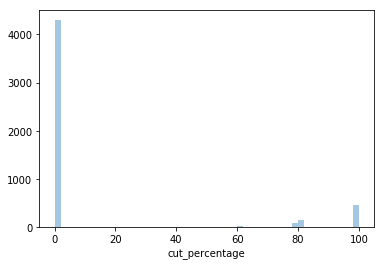

In [47]:
# Max Order Fulfilled Per Product
sns.distplot(df_tdf['cut_percentage'],kde=False)

In [48]:
df_tdf['DC_SKU']= df_tdf['DC']+'_'+df_tdf['SKU']
plant_capacity = df_tdf[(df_tdf['cut_percentage']==0)].groupby(by=['DC_SKU']).mean()['Purchase Order Units'].reset_index().rename(columns={'Purchase Order Units':'POU_Avg'})
plant_capacity['POU_Max'] = df_tdf[(df_tdf['cut_percentage']==0)].groupby(by=['DC_SKU']).max()['Purchase Order Units'].values
plant_capacity['POU_Min'] = df_tdf[(df_tdf['cut_percentage']==0)].groupby(by=['DC_SKU']).min()['Purchase Order Units'].values

In [49]:
plant_incapacity = df_tdf[(df_tdf['cut_percentage']>0)].groupby(by=['DC_SKU']).mean()['Purchase Order Units'].reset_index().rename(columns={'Purchase Order Units':'POUNF_Avg'})
plant_incapacity['POUNF_Max'] = df_tdf[(df_tdf['cut_percentage']>0)].groupby(by=['DC_SKU']).max()['Purchase Order Units'].values
plant_incapacity['POUNF_Min'] = df_tdf[(df_tdf['cut_percentage']>0)].groupby(by=['DC_SKU']).min()['Purchase Order Units'].values

tdf_capacity = pd.merge(plant_capacity,plant_incapacity,how='outer',on='DC_SKU')

In [51]:
print(df_tdf.shape)
print(df_tdf[(df_tdf['cut_percentage']>0)].shape)
print(df_tdf[(df_tdf['cut_percentage']==0)].shape)

(5200, 8)
(910, 8)
(4290, 8)


In [56]:
df_tdf['cut_ratio'] = [0 if c==0 else 1 for c in df_tdf['cut_percentage']]

In [72]:
tdf_capacity['DC'] = '0'
tdf_capacity['SKU'] = '0'
tdf_capacity['DC'] = tdf_capacity['DC_SKU'].apply(lambda x: x.split('_')[0])
tdf_capacity['SKU'] = tdf_capacity['DC_SKU'].apply(lambda x: x.split('_')[1])

In [73]:
tdf_capacity.head(1)

,DC_SKU,POU_Avg,POU_Max,POU_Min,POUNF_Avg,POUNF_Max,POUNF_Min,DC,SKU
0,DC East_SKU001,10.219512,46,0,58.909091,93,28,DC East,SKU001


In [75]:
tdf_capacity.pivot_table(index='SKU',columns='DC',values=['POU_Max','POUNF_Max','POU_Avg','POUNF_Avg','POU_Min','POUNF_Min'])

POUNF_Avg              POUNF_Max         POUNF_Min          \
DC          DC East      DC West   DC East DC West   DC East DC West   
SKU                                                                    
SKU001    58.909091    40.444444        93      68        28      22   
SKU002  2435.100000  2298.428571      4523    4369      1026    1200   
SKU003    17.333333    25.750000        31      54        13      13   
SKU004   179.000000   146.333333       361     252        80      81   
SKU005   107.555556    97.222222       286     234        47      42   
SKU006   159.571429   172.800000       394     517        71      74   
SKU007    37.300000    43.250000        72      65        24      24   
SKU008   125.285714   102.727273       216     185        66      65   
SKU009   504.625000   684.000000       778    1074       275     341   
SKU010   743.166667   560.545455      1883    1231       239     123   
SKU011   103.285714   101.692308       155     213        61      60   
SKU012    66.222222    73.666667       110     120        50      47   
SKU013   366.428571   344.333333       719     600       214     212   
SKU014    33.000000    42.000000        44      87        17      20   
SKU015    78.250000    84.800000       151     175        32      36   
SKU016   516.888889   531.000000       760     941       367     326   
SKU017   305.363636   302.571429       525     458       173     158   
SKU018   195.700000   160.600000       384     278        98     100   
SKU019  1021.933333   790.166667      1502    1192       545     512   
SKU020    98.727273   108.777778       163     192        57      59   
SKU021    97.545455   131.222222       133     247        47      58   
SKU022   448.600000   311.300000       937     643       178     171   
SKU023    48.727273    50.125000        82      82        26      29   
SKU024     4.875000     4.200000         9       7         3       3   
SKU025    87.444444   127.285714       223     236        53      47   
SKU026   358.000000   364.500000       641     708       224     221   
SKU027   143.909091   149.777778       321     266        47      53   
SKU028   243.444444   292.333333       404     498       146     151   
SKU029    71.777778    59.888889       143     136        30      27   
SKU030    74.000000    49.444444       137     119        36      29   
SKU031   413.750000   454.222222       723    1005       248     195   
SKU032   279.500000   369.333333       536     732       155     132   
SKU033  4790.333333  5056.500000      7262    6529      2567    3197   
SKU034    26.000000    32.000000        33      61        15      15   
SKU035    13.800000    11.625000        27      20         7       7   
SKU036   528.076923   472.666667       780     726       272     238   
SKU037   123.222222   123.333333       206     233        56      56   
SKU038   486.000000   343.111111      1102     700       193     185   
SKU039    15.454545    18.250000        25      31         7       8   
SKU040   186.000000   148.625000       458     271        77      90   
SKU041   272.454545   255.666667       484     447       141     137   
SKU042    55.250000    67.444444       107     178        26      27   
SKU043   377.400000   435.428571       708     850       225     219   
SKU044    22.000000    53.000000        22      98        22      21   
SKU045   129.909091   137.100000       302     266        57      60   
SKU046    60.666667    66.714286       115     123        33      27   
SKU047   214.181818   250.888889       401     524        94     118   
SKU048   766.625000   877.727273      1770    1922       379     447   
SKU049    69.285714    68.222222       112     154        34      35   
SKU050   918.272727   774.300000      1659    1347       467     360   

           POU_Avg              POU_Max         POU_Min          
DC         DC East      DC West DC East DC West DC East DC West  
SKU                                                          

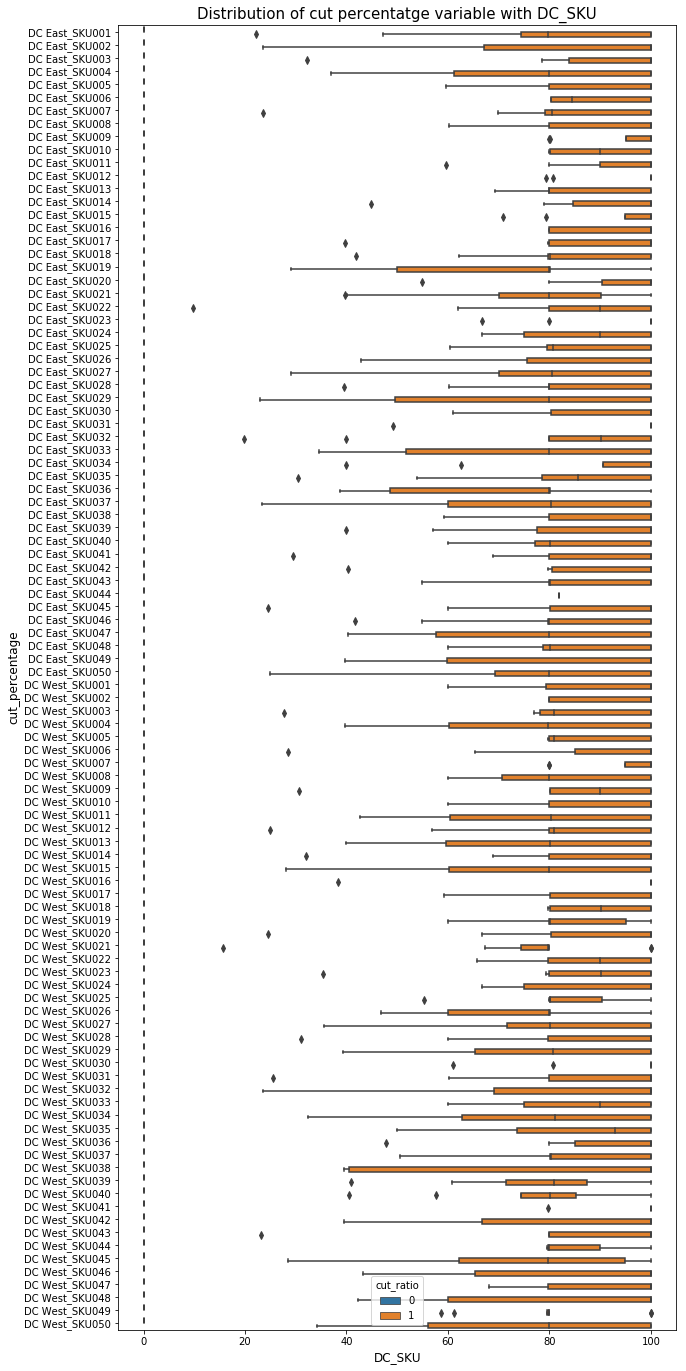

In [62]:
var_name = "DC_SKU"
x = 'cut_percentage'
z = 'cut_ratio'
col_order = np.sort(df_tdf[var_name].unique()).tolist()
plt.figure(figsize=(10,24))
sns.boxplot(y=var_name, x=x,hue=z, data=df_tdf, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel(x, fontsize=12)
plt.title("Distribution of cut percentatge variable with "+var_name, fontsize=15);


In [10]:
df_pazzo.head()

,SKU,Date,On Hand Inventory,Pageview Out of Stock,Average Price,Change in Pageviews,Consumer Ordered Units,Forecast 1 Week,Forecast 4 Week,Forecast 8 Week
0,SKU001,2017-10-02,519,0.020876,17.913664,0.076624,67,52,47,41
1,SKU001,2017-10-09,241,0.595398,13.520821,0.171255,49,45,42,36
2,SKU001,2017-10-16,559,0.000000,15.839939,0.088271,95,94,89,84
3,SKU001,2017-10-23,424,0.000000,13.128688,0.141562,79,80,79,71
4,SKU001,2017-10-30,488,0.041484,16.277441,-0.164290,49,81,76,78


In [25]:
df_pazzo.describe(include='all')

,SKU,Date,On Hand Inventory,Pageview Out of Stock,Average Price,Change in Pageviews,Consumer Ordered Units,Forecast 1 Week,Forecast 4 Week,Forecast 8 Week
count,2600,2600,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
unique,50,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SKU004,2018-05-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,52,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2017-10-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-09-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,5152.610769,0.040077,15.378417,0.046112,800.417308,978.329615,966.366538,989.068846
std,NaN,NaN,10845.988959,0.101567,6.804144,0.398145,1673.706884,2040.369895,2005.515002,2094.440820
min,NaN,NaN,36.000000,0.000000,1.493412,-2.276222,4.000000,7.000000,11.000000,10.000000
25%,NaN,NaN,659.750000,0.000000,11.240310,-0.104834,114.750000,144.000000,149.000000,142.000000


In [24]:
df_pazzo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 10 columns):
SKU                       2600 non-null object
Date                      2600 non-null datetime64[ns]
On Hand Inventory         2600 non-null int64
Pageview Out of Stock     2600 non-null float64
Average Price             2600 non-null float64
Change in Pageviews       2600 non-null float64
Consumer Ordered Units    2600 non-null int64
Forecast 1 Week           2600 non-null int64
Forecast 4 Week           2600 non-null int64
Forecast 8 Week           2600 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 203.2+ KB


In [159]:
df_pazzo.head()

,SKU,Date,On Hand Inventory,Pageview Out of Stock,Average Price,Change in Pageviews,Consumer Ordered Units,Forecast 1 Week,Forecast 4 Week,Forecast 8 Week
0,SKU001,2017-10-02,519,0.020876,17.913664,0.076624,67,52,47,41
1,SKU001,2017-10-09,241,0.595398,13.520821,0.171255,49,45,42,36
2,SKU001,2017-10-16,559,0.000000,15.839939,0.088271,95,94,89,84
3,SKU001,2017-10-23,424,0.000000,13.128688,0.141562,79,80,79,71
4,SKU001,2017-10-30,488,0.041484,16.277441,-0.164290,49,81,76,78


In [ ]:
# When bulk order happened, what happened to prize at the time for the product
# What is chage in pageviews
# Effet of Pageview out of stock on demand

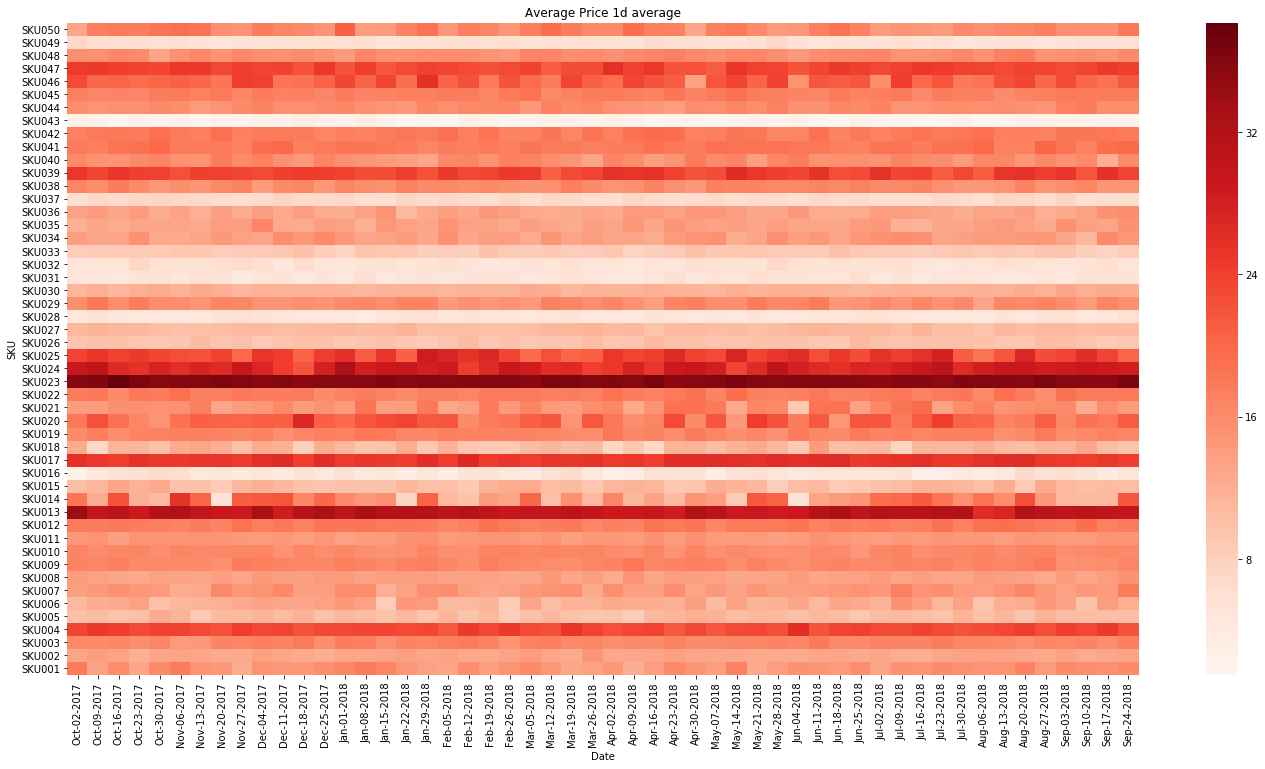

In [163]:
#sns.distplot(df_pazzo['Average Price'])
#b = df_pazzo['Average Price'].quantile(0.95)
#a = df_pazzo['Average Price'].quantile(0.05)
temp =heatmap_plot(df_pazzo,'SKU','Date','Average Price',title='Average Priceby SKU',time_grouper='1d',figsize=(24,12))

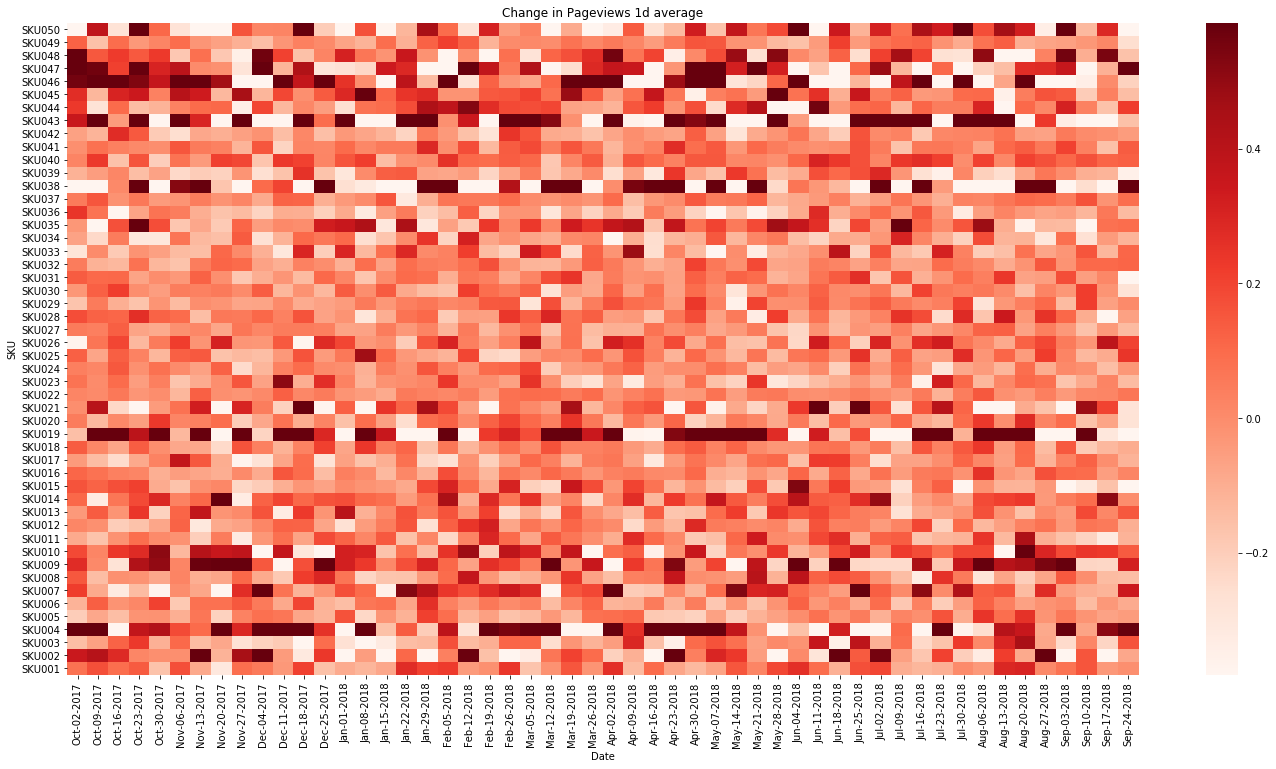

In [161]:
#sns.distplot(df_pazzo['Average Price'])
b = df_pazzo['Change in Pageviews'].quantile(0.95)
a = df_pazzo['Change in Pageviews'].quantile(0.05)
temp =heatmap_plot(df_pazzo,'SKU','Date','Change in Pageviews',title='Change in Pageviews by SKU',time_grouper='1d',vmax=b,vmin=a,figsize=(24,12))

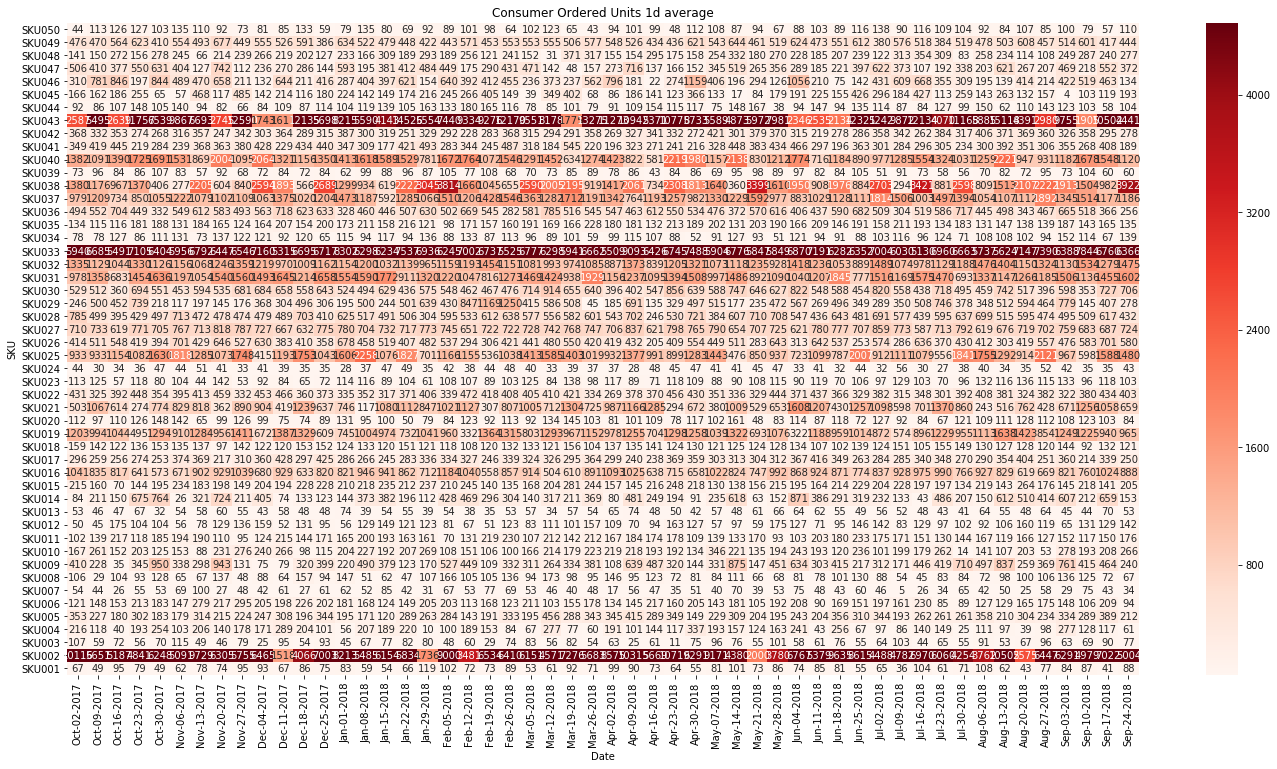

In [176]:
#sns.distplot(df_pazzo['Average Price'])
b = df_pazzo['Consumer Ordered Units'].quantile(0.95)
a = df_pazzo['Consumer Ordered Units'].quantile(0.05)
temp =heatmap_plot(df_pazzo,'SKU','Date','Consumer Ordered Units',title='Consumer Order Units by SKU',time_grouper='1d',vmax=b,vmin=a,figsize=(24,12))

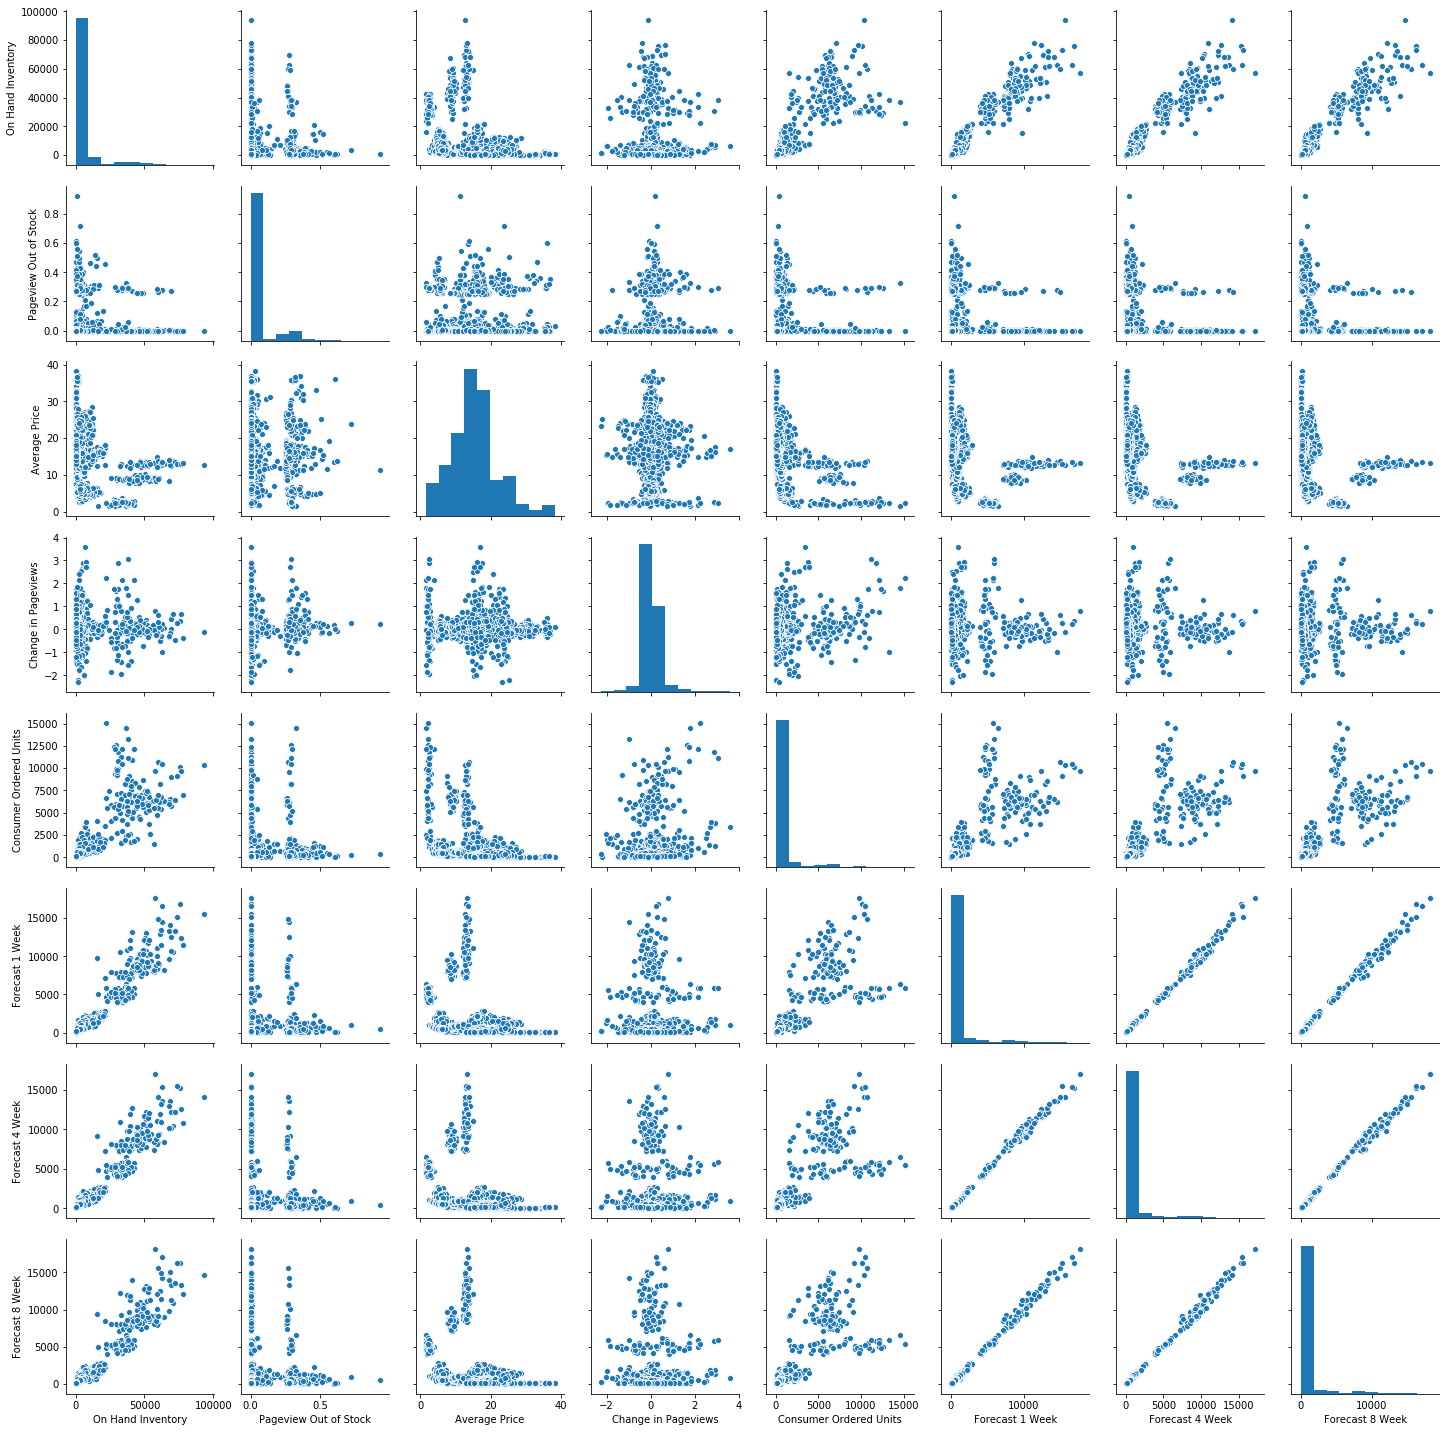

In [164]:
sns.pairplot(df_pazzo)

In [ ]:
df_pazzo['Consumer Ordered Units']

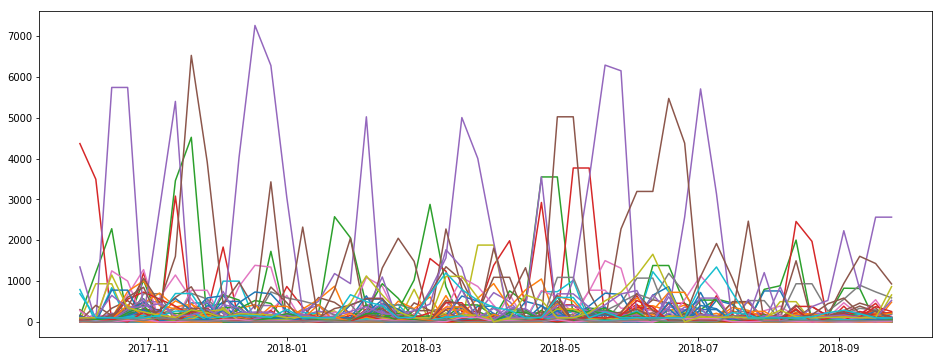

In [155]:
fig,ax = plt.subplots(1,figsize =(16,6))
for sku in df_tdf['DC_SKU'].unique():
    temp = df_tdf[(df_tdf['DC_SKU']==sku)]
    #temp['cut'] = temp['Purchase Order Units'] - temp['Fulfilled Units']
    temp = temp.sort_values(by='Date')
    ax.plot(temp['Date'],temp['Purchase Order Units'])
    #ax.plot(temp['Date'],temp['Fulfilled Units'],color='red');
    #ax.plot(temp['Date'],temp['cut'])
    #ax.legend()
    ax.grid()
    #ax.set_title(sku,fontsize=16);
    

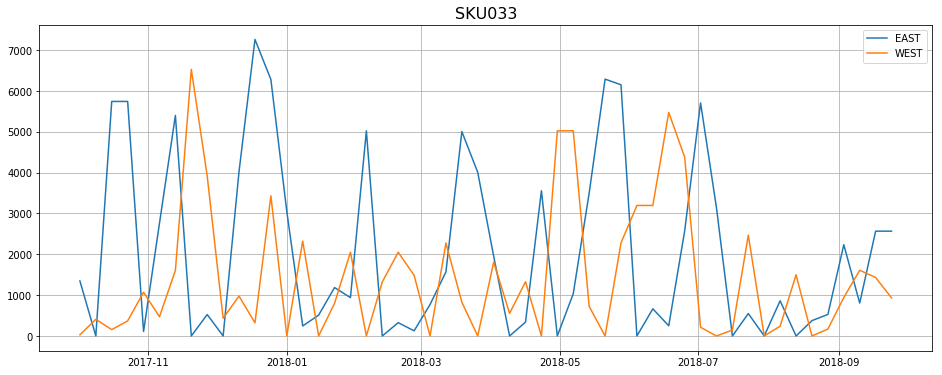

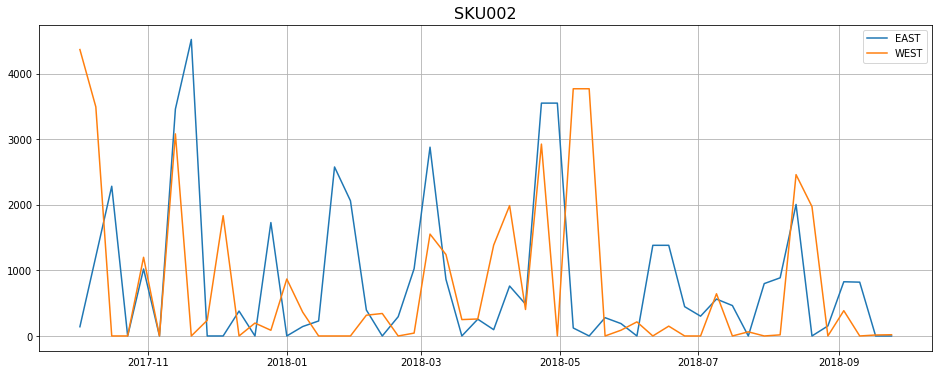

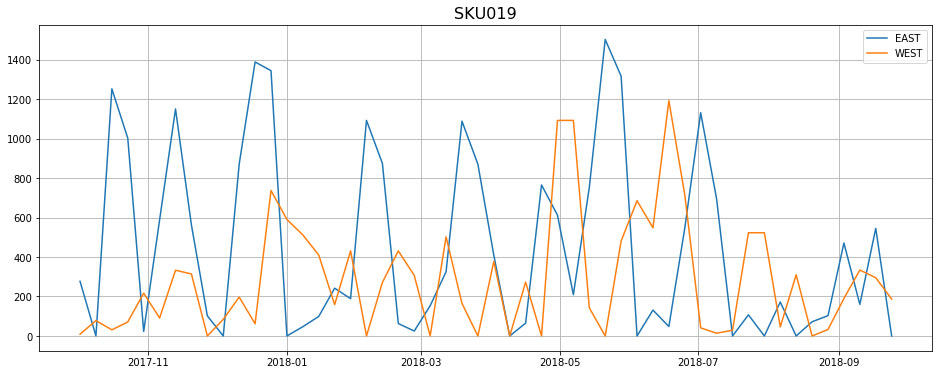

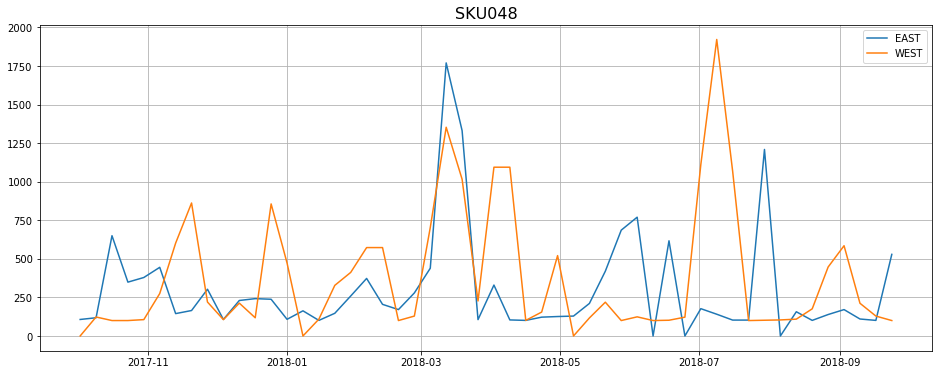

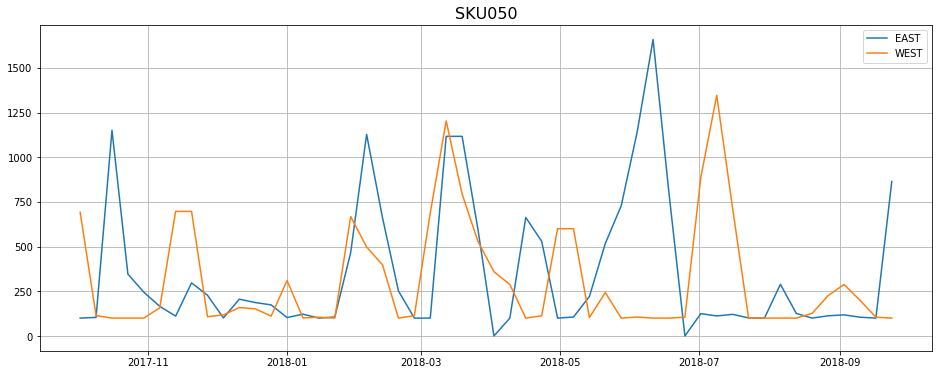

In [175]:
# Calculating correlation between each day's order
skus=['SKU033','SKU002','SKU019','SKU048','SKU050']
for sku in skus:
    fig,ax = plt.subplots(1,figsize =(16,6))
    temp = df_tdf[(df_tdf['SKU']==sku)]
    #temp['cut'] = temp['Purchase Order Units'] - temp['Fulfilled Units']
    temp = temp.sort_values(by='Date')
    ax.plot(temp['Date'][(temp['DC']=='DC East')],temp['Purchase Order Units'][(temp['DC']=='DC East')],label='EAST')
    ax.plot(temp['Date'][(temp['DC']=='DC West')],temp['Purchase Order Units'][(temp['DC']=='DC West')],label='WEST')
    #ax.plot(temp['Date'],temp['Fulfilled Units'],color='red');
    #ax.plot(temp['Date'],temp['cut'])
    ax.legend()
    ax.grid()
    ax.set_title(sku,fontsize=16);
    

In [ ]:
# Deviding the Products based on some categories
# Constant Demand
# Seasonal
# High Fluctuation
# Feature Engineering Based on the Pazzo data
# And assume by how many week before you can predict it.